In [1]:
# 导库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

In [2]:
#  数据读取
import os
os.getcwd()
train_data = pd.read_table('D:/industrial-steam-forecast/zhengqi_train.txt')
test_data = pd.read_table('D:/industrial-steam-forecast/zhengqi_test.txt')
print(train_data.describe())

                V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.18200

In [3]:
# 数据预处理————检查有无NULL
print(train_data.isnull().sum())

V0        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
target    0
dtype: int64


In [4]:
# 数据划分
train_data_X = train_data.drop(['target'], axis = 1)
train_data_y = train_data['target']

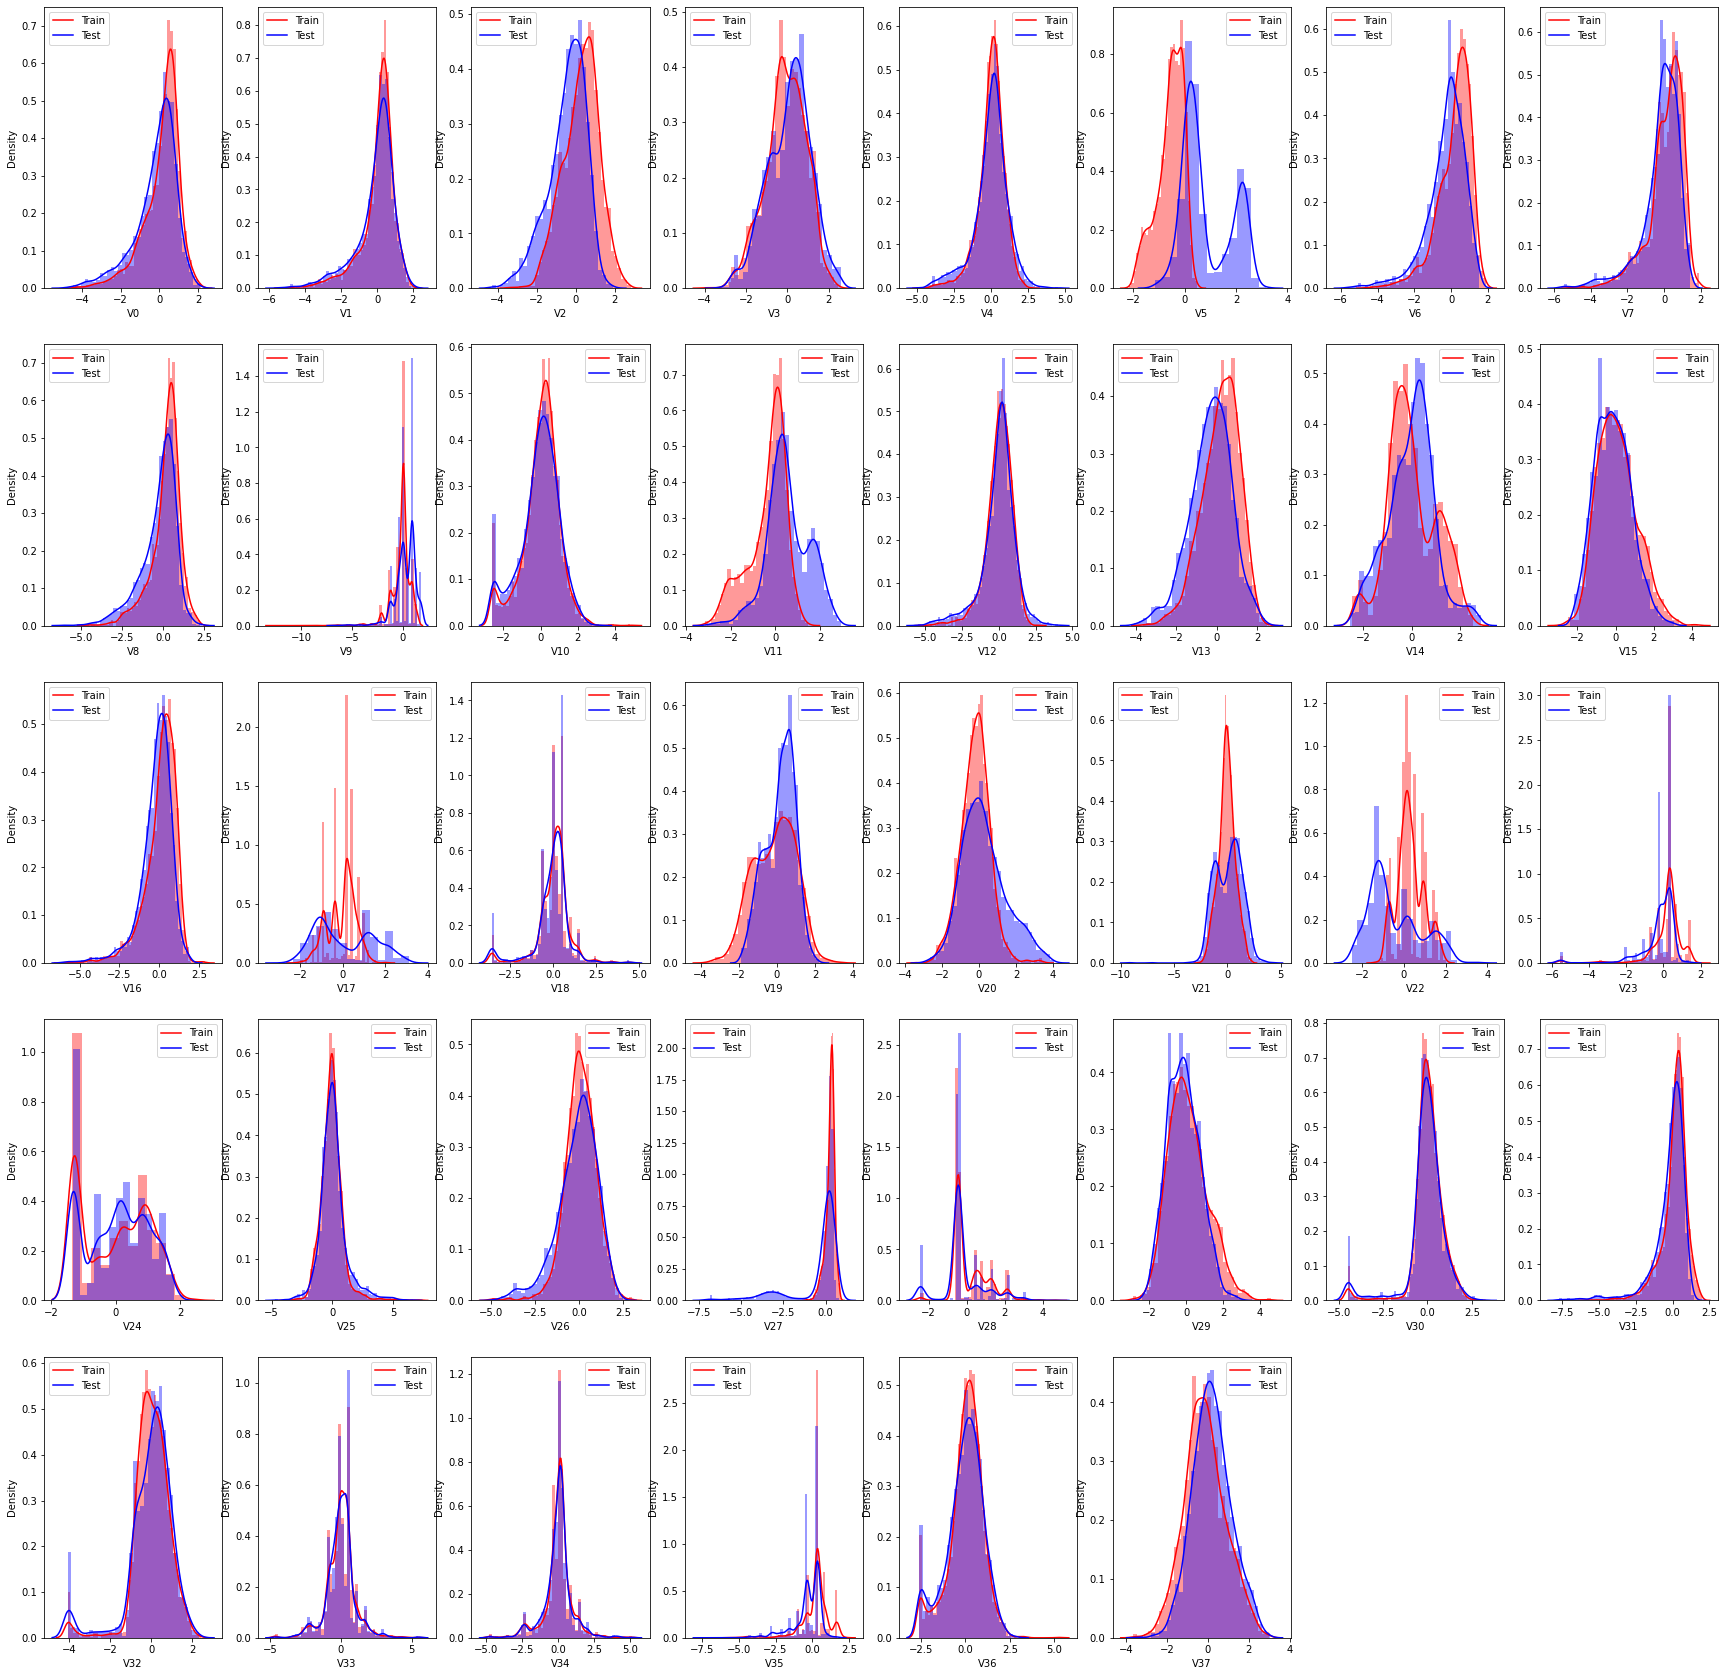

In [5]:
# 数据预处理
# plt.subplots(figsize=(4,4))
# sns.distplot(train_data['target'])
# plt.show()

plt.figure(figsize=(30,30))
i = 1
for col in test_data.columns:

    plt.subplot(5,8,i)
    sns.distplot(train_data_X[col], color = 'red')
    sns.distplot(test_data[col], color = 'blue')
    plt.legend(['Train', 'Test'])   
    i += 1
# plt.tight_layout()

In [6]:
# pip install --upgrade scipy

In [7]:
# 去除特征V2，V5，V9，V11，v13，V14，V17，V19，V20，V21，V22，V27。
train_data_X_new = train_data_X.drop(['V2','V5','V9','V11','V13','V14','V17','V19','V20','V21','V22','V27'], axis = 1)
test_data_new = test_data.drop(['V2','V5','V9','V11','V13','V14','V17','V19','V20','V21','V22','V27'], axis = 1)
all_data_X = pd.concat([train_data_X_new,test_data_new])

In [8]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_X_new, train_data_y, test_size = 0.3, random_state = 827)

In [9]:
# 简单线性回归
def Linear_Regression(X_train,X_test,y_train,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))

    print('Linear_Regression的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('Linear_Regression的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('Linear_Regression的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')

In [10]:
# SVM
def Linear_SVR(X_train,X_test,y_train,y_test):
    model = LinearSVR()
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    
    print('Linear_SVR的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('Linear_SVR的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('Linear_SVR的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')    


In [11]:
# 随机森林
def RandomForest_Regressor(X_train,X_test,y_train,y_test,n_estimators = 70):
    model = RandomForestRegressor(n_estimators= n_estimators)
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    print('RandomForest_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('RandomForest_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('RandomForest_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')   

In [12]:
# XGBRegression
def XGB_Regressor(X_train,X_test,y_train,y_test):
    model = XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    print('XGB_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('XGB_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('XGB_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')   
    
#     cv_params = {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200]}
#     xgb = XGBRegressor(**params)
#     xgb = gsearch(xgb, cv_params)

In [13]:
%%time
# 随机森林  网格搜索，参数调优
# param_grid= {'n_estimators':[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,125,150,200],
#               'max_features':('auto','sqrt','log2')}
# m = GridSearchCV(RandomForestRegressor(random_state=827),param_grid)
# m = m.fit(X_train,y_train)
# mse = mean_squared_error(y_test,m.predict(X_test))
# print("该参数下得到的MSE值为：{}".format(mse))
# print("该参数下得到的最佳得分为：{}".format(m.best_score_))
# print("最佳参数为：{}".format(m.best_params_))

RandomForest_Regressor_params = {'n_estimators':200, 'max_features':'sqrt'}


def RandomForest_Regressor_Then(X_train,X_test,y_train,y_test):
    model = RandomForestRegressor(** RandomForest_Regressor_params)
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    
    print('调参后的RandomForest_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('调参后的RandomForest_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('调参后的RandomForest_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')

Wall time: 0 ns


In [14]:
%%time
# xgb  网格搜索，参数调优
# c初始参数
# params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
#           'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
XGB_Regressor_Then_params = {
            'learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 6, 'min_child_weight': 9, 'seed': 0,
            'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.3, 'reg_alpha': 0, 'reg_lambda': 1}
# 最佳迭代次数：n_estimators、min_child_weight 、最大深度 max_depth、后剪枝参数 gamma、样本采样subsample 、 列采样colsample_bytree
# L1正则项参数reg_alpha 、 L2正则项参数reg_lambda、学习率learning_rate
# param_grid= {
#              'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1250,1500,1750,2000],
#              'max_depth': [3,4,5,6,7,8,9,10],
#              'min_child_weight': [1,2,3,4,5,6,7,8,9,10],
#              'gamma': [0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6],
#              'subsample': [0.5,0.6,0.7,0.8,0.9],
#              'colsample_bytree': [0.6,0.7,0.8,0.9],
#              'reg_alpha': [0,0.02,0.05,0.1,1,2,3],
#              'reg_lambda': [0,0.02,0.05,0.1,1,2,3],
#              'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2,]}
# m = GridSearchCV(XGBRegressor(objective ='reg:squarederror',**params),param_grid)
# m = m.fit(X_train,y_train)
# mse = mean_squared_error(y_test,m.predict(X_test))
# print("该参数下得到的MSE值为：{}".format(mse))
# print("该参数下得到的最佳得分为：{}".format(m.best_score_))
# print("最佳参数为：{}".format(m.best_params_))


# 调参结束，进行验证
#     xgb = XGBRegressor(**params)
#     pred = xgb.predict(X_test)
#     score(y_test, pred)

def XGB_Regressor_Then(X_train,X_test,y_train,y_test):
    model = XGBRegressor(**XGB_Regressor_Then_params,objective ='reg:squarederror')
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    
    print('调参后的XGB_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('调参后的XGB_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('调参后的XGB_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')   
    
    
    
# def XGB_Regressor_Then(X_train,y_train,test_data):
#     model = XGBRegressor(**params,objective ='reg:squarederror')
#     model.fit(X_train,y_train)
#     predict = model.predict(test_data)
#     return predict

Wall time: 0 ns


In [15]:
if __name__ == '__main__':
    Linear_Regression(X_train, X_test, y_train, y_test)
    Linear_SVR(X_train, X_test, y_train, y_test)
    RandomForest_Regressor(X_train, X_test, y_train, y_test, n_estimators = 70)
    RandomForest_Regressor_Then(X_train, X_test, y_train, y_test)
    XGB_Regressor(X_train, X_test, y_train, y_test)
    XGB_Regressor_Then(X_train, X_test, y_train, y_test)

Linear_Regression的训练集得分：0.8695977870407323
Linear_Regression的测试集得分：0.8667633776789493
Linear_Regression的测试集的MSE得分为：0.14080248071909743
--------------------------------
Linear_SVR的训练集得分：0.8682652185827783
Linear_SVR的测试集得分：0.8643132536665081
Linear_SVR的测试集的MSE得分为：0.1433917353325164
--------------------------------
RandomForest_Regressor的训练集得分：0.9801818612411011
RandomForest_Regressor的测试集得分：0.870109531714891
RandomForest_Regressor的测试集的MSE得分为：0.13726631490431465
--------------------------------
调参后的RandomForest_Regressor的训练集得分：0.9818286751370393
调参后的RandomForest_Regressor的测试集得分：0.8699885078369651
调参后的RandomForest_Regressor的测试集的MSE得分为：0.1373942111384083
--------------------------------
XGB_Regressor的训练集得分：0.9994555335431988
XGB_Regressor的测试集得分：0.8700840536635152
XGB_Regressor的测试集的MSE得分为：0.1372932397300505
--------------------------------
调参后的XGB_Regressor的训练集得分：0.9716901878375099
调参后的XGB_Regressor的测试集得分：0.8787211765572647
调参后的XGB_Regressor的测试集的MSE得分为：0.1281656567237414
---------------------

In [16]:
#结果输出
# m = XGBRegressor()
# m.fit(X_train, y_train)
# model = RandomForestRegressor(**RandomForest_Regressor_params)
# model.fit(X_train, y_train)
# predict = model.predict(test_data_new)
# np.savetxt('D:/industrial-steam-forecast/submit3.txt',predict)

In [17]:
# # 模型评估
# models = [Linear_Regression, Linear_SVR, RandomForest_Regressor,RandomForest_Regressor_Then,XGB_Regressor,XGB_Regressor_Then]
# model_names = ['LinearRegression', 'LinearSVR', 'RandomForestRegressor', 'RandomForestRegressor_Then', 'XGBRegressor', 'XGBRegressor_Then']
# plt.figure(figsize=(20,5))

# estimators = {}
# estimators['Linear']=LinearRegression()
# estimators['svr'] = LinearSVR()
# estimators['forest'] = RandomForestRegressor()
# estimators['xgb'] = XGBRegressor()


# for i, estimators in enumerate(models):
#     train_sizes, train_scores, test_scores = learning_curve(estimator,
#                                                             train_data_X_new, 
#                                                             train_data_y, 
#                                                             cv=5,
#                                                             scoring='mean_squared_error',
#                                                             train_sizes = np.linspace(0.1,1.0,100), 
#                                                             n_jobs = 1)
#     train_scores_mean = -train_scores.mean(axis=1)
#     test_scores_mean = -test_scores.mean(axis=1)
    
#     plt.subplot(2,3,i+1)
#     plt.plot(train_sizes, train_scores_mean, '*-', label='Train')
#     plt.plot(train_sizes, test_scores_mean, '#-', label='Test')
#     plt.xlabel('Train_size')
#     plt.ylabel('Score')
#     plt.ylim([0,0.25])
#     plt.title(model_names[i], fontsize=16)
#     plt.legend()
#     plt.grid()
    
# plt.tight_layout()

In [18]:
# 得出每个模型的predict

lr=LinearRegression()
lr.fit(X_train,y_train)
linear_predict = lr.predict(X_test)

svr=LinearSVR()
svr.fit(X_train,y_train)
svr_predict = svr.predict(X_test)

rf=RandomForestRegressor(n_estimators = 200, max_features = 'sqrt')
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

xgb=XGBRegressor(learning_rate = 0.1, 
                 n_estimators = 200, 
                 max_depth = 6, 
                 min_child_weight =9, 
                 seed = 0,
                 subsample = 0.8, 
                 colsample_bytree = 0.8, 
                 gamma = 0.3, 
                 reg_alpha = 0, 
                 reg_lambda = 1,
                objective ='reg:squarederror')
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)


# svr_predict = LinearSVR.predict(X_test)
# rf_Then_predict = model.predict(X_test)
# xgb_Then_predict = XGBRegressor.predict(X_test)

In [19]:
# %%time
# # 模型融合
# # def model_mix(pred_1, pred_2, pred_3, pred_4):
# def model_mix(pred_1, pred_2, pred_3):
# #     result = pd.DataFrame(columns=['LinearRegression','SVR','RandomForestRegressor','XGBRegressor','Combine'])
#     result = pd.DataFrame(columns=['LinearRegression','SVR','RandomForestRegressor','Combine'])
#     for a in range (30):
#         for b in range(30):
#             for c in range(1,30):
# #                 for d in range(25):
# #                     y_pred = (a*pred_1 + b*pred_2 + c*pred_3 + d*pred_4) / (a+b+c+d)
#                     y_pred = (a*pred_1 + b*pred_2 + c*pred_3 ) / (a+b+c)
#                     mse = mean_squared_error(y_test,y_pred)
                    
#                     result = result.append([{'LinearRegression':a, 
#                                              'SVR':b, 
#                                              'RandomForestRegressor':c, 
# #                                              'XGBRegressor':d,
#                                              'Combine':mse}],
#                                              ignore_index=True)
#     return result

# # model_combine = model_mix(linear_predict, svr_predict, rf_predict, xgb_predict)
# model_combine = model_mix(linear_predict, svr_predict, rf_predict)
# model_combine.sort_values(by='Combine', inplace=True)
# model_combine.head()

In [20]:
# # 将3种模型融合

# pre_lr = lr.predict(test_data_new)
# pre_svr = svr.predict(test_data_new)
# pre_rf = rf.predict(test_data_new)

# mix_predict = (10*pre_lr+0*pre_svr+12*pre_rf) / 22

# np.savetxt('D:/industrial-steam-forecast/mix_predict.txt',mix_predict)

# print('Finished!')

In [21]:
%%time
# 模型融合
def model_mix(pred_1, pred_2, pred_3, pred_4):
    result = pd.DataFrame(columns=['LinearRegression','SVR','RandomForestRegressor','XGBRegressor','Combine'])

    for a in range (20):
        for b in range(20):
            for c in range(20):
                for d in range(1,20):
                    y_pred = (a*pred_1 + b*pred_2 + c*pred_3 + d*pred_4) / (a+b+c+d)
                    
                    mse = mean_squared_error(y_test,y_pred)
                    
                    result = result.append([{'LinearRegression':a, 
                                             'SVR':b, 
                                             'RandomForestRegressor':c, 
                                             'XGBRegressor':d,
                                             'Combine':mse}],
                                             ignore_index=True)
    return result

model_combine = model_mix(linear_predict, svr_predict, rf_predict, xgb_predict)

model_combine.sort_values(by='Combine', inplace=True)
model_combine.head()

Wall time: 7min 30s


,LinearRegression,SVR,RandomForestRegressor,XGBRegressor,Combine
53251,7,0,2,14,0.124003
45649,6,0,2,12,0.124005
22824,3,0,1,6,0.124005
68474,9,0,3,18,0.124005
30426,4,0,1,8,0.124006


In [22]:
# 对四种模型进行加权融合
# test = np.array(test_data_new)

pre_lr = lr.predict(test_data_new)
pre_svr = svr.predict(test_data_new)
pre_rf = rf.predict(test_data_new)
pre_xgb = xgb.predict(test_data_new)

mix_predict = (7*pre_lr + 0*pre_svr + 1*pre_rf + 18*pre_xgb) /26


np.savetxt('D:/industrial-steam-forecast/four_mix_predict.txt',mix_predict)
print('Finished!')



# X_test = np.array(dtest)
# ans_lasso = lasso.predict(X_test)
# ans_svr = svr.predict(X_test)
# ans_xgb = xgb.predict(X_test)
# ans_mix = (ans_lasso + 5 * ans_svr + 2 * ans_xgb) / 8
# pd.Series(ans_mix).to_csv('正态+标准化.txt', sep='\t', index=False)
# print('Finished!')

Finished!


In [23]:
%%time
# 2种模型融合
def model_mix(pred_1, pred_2):
    result = pd.DataFrame(columns=['LinearRegression','RandomForestRegressor','Combine'])

    for a in range (100):
        for b in range(1,100):
                    y_pred = (a*pred_1 + b*pred_2 ) / (a+b)
                    
                    mse = mean_squared_error(y_test,y_pred)
                    
                    result = result.append([{'LinearRegression':a, 
                                             'RandomForestRegressor':b, 
                                             'Combine':mse}],
                                             ignore_index=True)
    return result

model_combine = model_mix(linear_predict,  rf_predict)

model_combine.sort_values(by='Combine', inplace=True)
model_combine.head()

Wall time: 10.1 s


,LinearRegression,RandomForestRegressor,Combine
7716,77,94,0.13022
6814,68,83,0.13022
5912,59,72,0.13022
4509,45,55,0.13022
7215,72,88,0.13022


In [24]:
# 对2种模型进行加权融合,多次训练

pre_lr = lr.predict(test_data_new)
# pre_svr = svr.predict(test_data_new)
pre_rf = rf.predict(test_data_new)
# pre_xgb = xgb.predict(test_data_new)

mix_predict = (29*pre_lr + 41*pre_rf) /70


np.savetxt('D:/industrial-steam-forecast/lr+Rf_mix_predict.txt',mix_predict)
print('Finished!')




Finished!


In [ ]:
%%time
# 2种模型融合，继续优化
def model_mix(pred_1, pred_2):
    result = pd.DataFrame(columns=['LinearRegression','RandomForestRegressor','Combine'])

    for a in range (1000):
        for b in range(1,1000):
                    y_pred = (a*pred_1 + b*pred_2 ) / (a+b)
                    
                    mse = mean_squared_error(y_test,y_pred)
                    
                    result = result.append([{'LinearRegression':a, 
                                             'RandomForestRegressor':b, 
                                             'Combine':mse}],
                                             ignore_index=True)
    return result

model_combine = model_mix(linear_predict,  rf_predict)

model_combine.sort_values(by='Combine', inplace=True)
model_combine.head()

In [ ]:
# 对2种模型进行加权融合,多次训练

pre_lr = lr.predict(test_data_new)
# pre_svr = svr.predict(test_data_new)
pre_rf = rf.predict(test_data_new)
# pre_xgb = xgb.predict(test_data_new)

mix_predict = (29*pre_lr + 41*pre_rf) /70


np.savetxt('D:/industrial-steam-forecast/lr+Rf_Then_mix_predict.txt',mix_predict)
print('Finished!')

